In [29]:
# Importing necessary libraries for data analysis and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [30]:
# Load the dataset
df = pd.read_csv('/healthcare_data.csv')  # Assuming the dataset is named 'healthcare_data.csv'

# Display the first few rows of the dataset
df.head()


,PatientID,Age,BloodPressure,SugarLevel,Weight,Date
0,1,25,120,95,68,2022-01-01
1,2,45,130,100,75,2022-01-01
2,3,55,140,105,85,2022-01-01
3,4,30,118,92,72,2022-01-02
4,5,60,150,110,90,2022-01-02


In [14]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Check the data types of each column
print("\nData Types:")
print(df.dtypes)

# Get basic statistical information about the dataset
print("\nBasic Statistical Info:")
print(df.describe())


Missing values in each column:
PatientID        0
Age              0
BloodPressure    0
SugarLevel       0
Weight           0
Date             0
dtype: int64

Data Types:
PatientID         int64
Age               int64
BloodPressure     int64
SugarLevel        int64
Weight            int64
Date             object
dtype: object

Basic Statistical Info:
       PatientID        Age  BloodPressure  SugarLevel     Weight
count  15.000000  15.000000      15.000000   15.000000  15.000000
mean    8.000000  44.733333     131.000000  101.266667  78.400000
std     4.472136  15.177364      13.163803    8.013085   9.241212
min     1.000000  22.000000     110.000000   88.000000  65.000000
25%     4.500000  32.500000     121.000000   95.500000  71.000000
50%     8.000000  45.000000     130.000000  102.000000  78.000000
75%    11.500000  57.500000     140.000000  107.000000  86.000000
max    15.000000  70.000000     155.000000  115.000000  95.000000


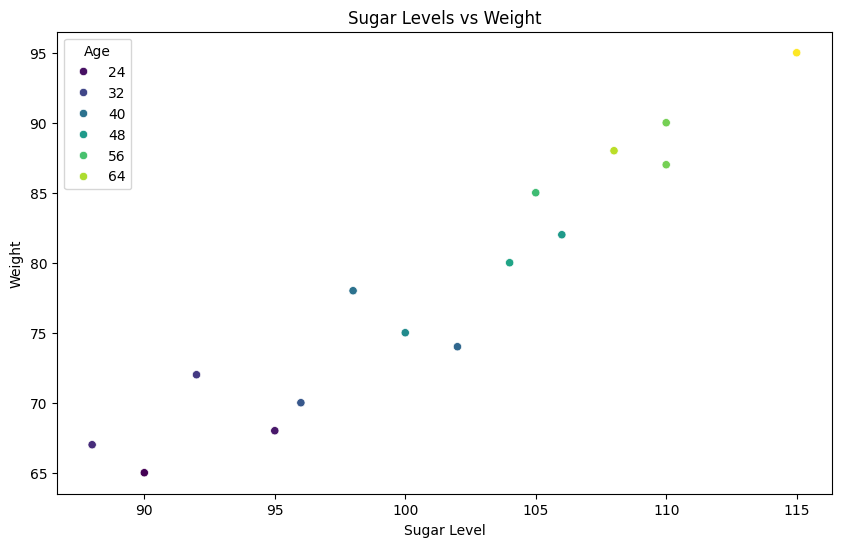

In [16]:
# Scatter plot of Sugar Levels vs Weight
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='SugarLevel', y='Weight', hue='Age', palette='viridis')
plt.title('Sugar Levels vs Weight')
plt.xlabel('Sugar Level')
plt.ylabel('Weight')
plt.show()


<ipython-input-31-b0936b4d6b7d>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_bp_by_age = df.groupby('AgeGroup')['BloodPressure'].mean()


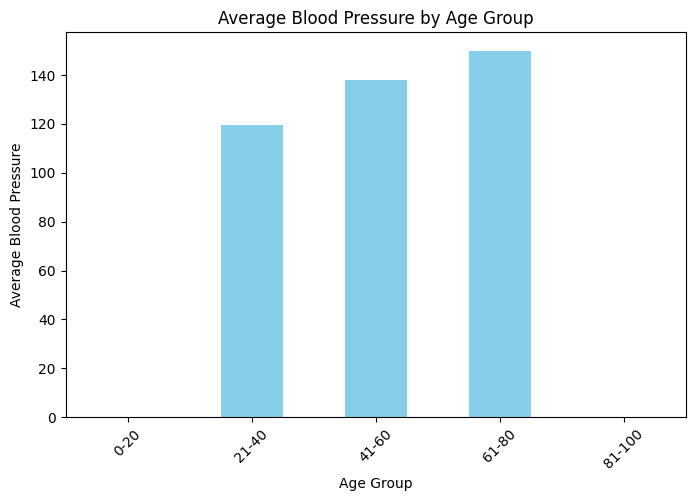

In [31]:
# Create an Age Group column (you can adjust the age ranges)
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Calculate the average blood pressure per age group
avg_bp_by_age = df.groupby('AgeGroup')['BloodPressure'].mean()

# Plot the average blood pressure by age group
plt.figure(figsize=(8,5))
avg_bp_by_age.plot(kind='bar', color='skyblue')
plt.title('Average Blood Pressure by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Blood Pressure')
plt.xticks(rotation=45)
plt.show()


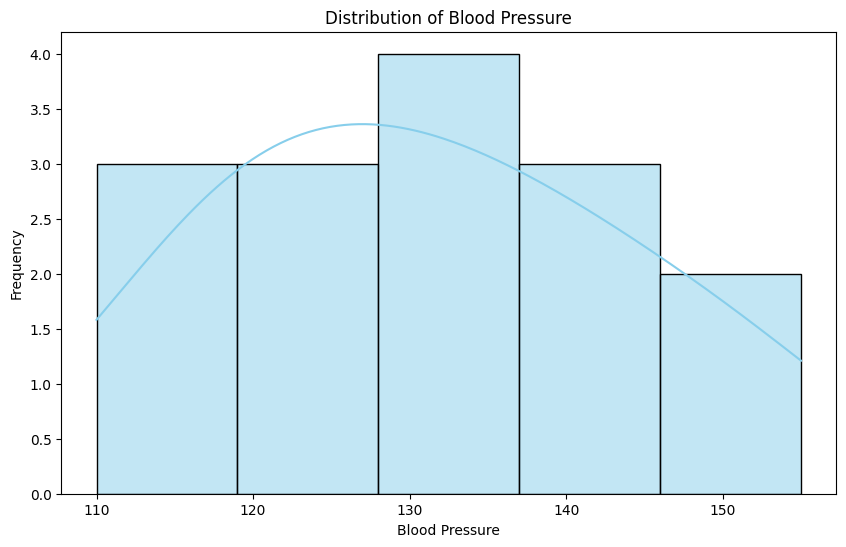

In [17]:
# Distribution of Blood Pressure
plt.figure(figsize=(10, 6))
sns.histplot(df['BloodPressure'], kde=True, color='skyblue')
plt.title('Distribution of Blood Pressure')
plt.xlabel('Blood Pressure')
plt.ylabel('Frequency')
plt.show()


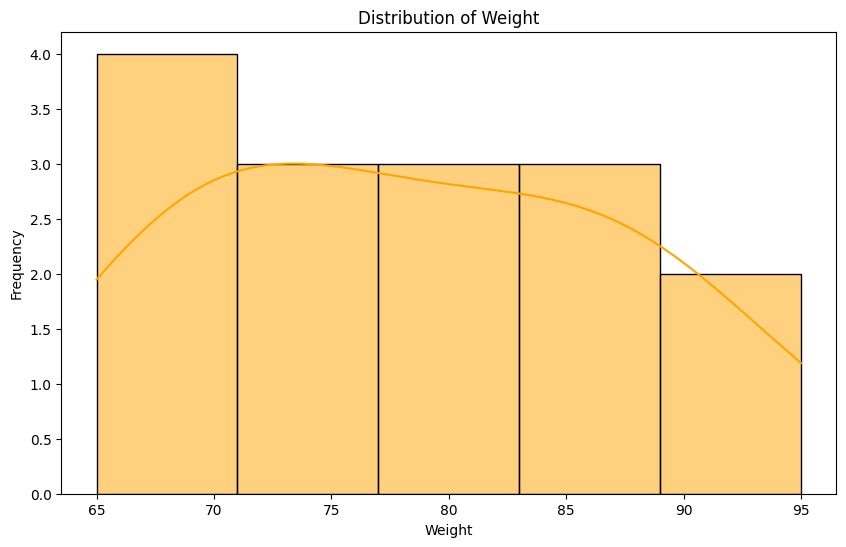

In [18]:
# Distribution of Weight
plt.figure(figsize=(10, 6))
sns.histplot(df['Weight'], kde=True, color='orange')
plt.title('Distribution of Weight')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()


Mean Squared Error of the model: 3.455068705383812


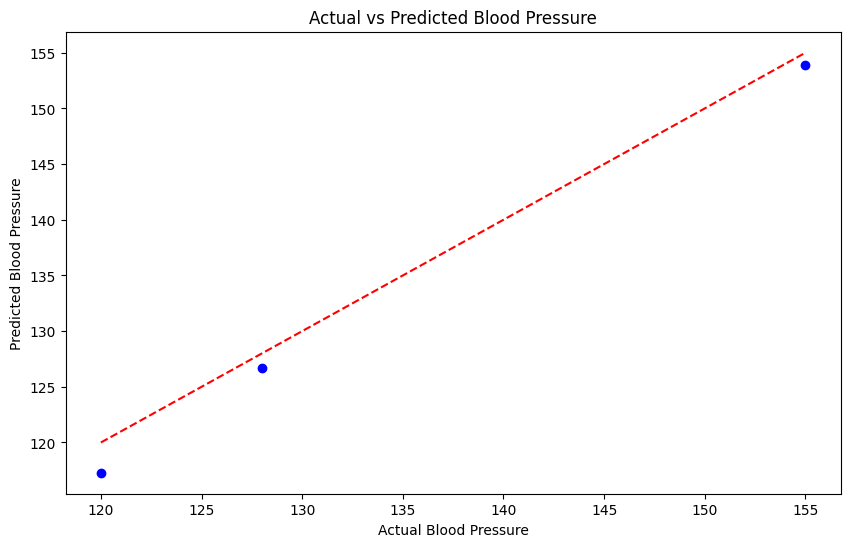

In [28]:
# Make predictions using the test data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error of the model: {mse}")

# Plotting actual vs predicted blood pressure
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Blood Pressure')
plt.xlabel('Actual Blood Pressure')
plt.ylabel('Predicted Blood Pressure')
plt.show()
